In [1]:
# import python's modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
# figure's size setting
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

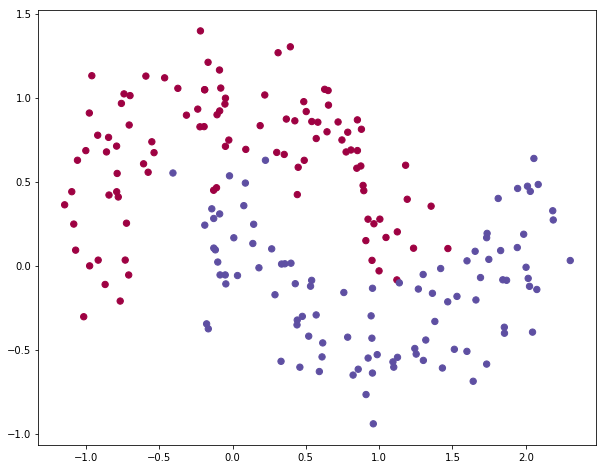

In [3]:
# generating dataset
np.random.seed(1)
X, y = sklearn.datasets.make_moons(200, noise=0.2)
plt.scatter(X[:, 0], X[:, 1], s=40, c = y, cmap=plt.cm.Spectral)

In [4]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV(cv=10)
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [5]:
# display plot function
def plot_decision_boundary(pred_func):
    # set min and max with some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # generate grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # predict the function value for the whole grid
    z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    # plot for classifier line
    plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
    # plot for display date      
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

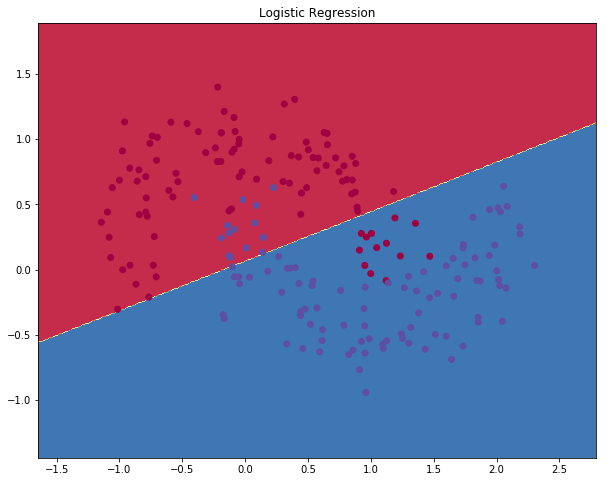

In [6]:
# logistic regression classifier plot
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [7]:
# neural network constant
m = len(X)
neural_network_input_dimention = 2
neural_network_output_dimention = 2
learning_rate = 0.01
reguralization_lambda = 0.01

In [8]:
# calculate loss function
def calculate_loss(model):
    # get model's weight and bias    
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    # Forward propagation
    z1 = X.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    # softmax function
    e = np.exp(z2)
    hypothetis = e / np.sum(e, axis=1, keepdims=True)
    # Calculating the loss
    log_hypothetis = - np.log(hypothetis[range(m), y])
    loss = np.sum(log_hypothetis)
    # add reguralize
    loss += reguralization_lambda/2 * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
    return 1./m * loss

In [9]:
def predict(model, x):
    w1, b1, w2, b2 = model['w1'], model['b1'], model['w2'], model['b2']
    # Forward propagation
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    e = np.exp(z2)
    hypothetis = e / np.sum(e, axis=1, keepdims=True)
    # returns the class with the highest probability
    return np.argmax(hypothetis, axis=1)

In [10]:
def build_model(neural_network_hidden_dimention, gradientDescentIter=20000, print_loss=False):
    # random initialzation   
    np.random.seed(1)
    # weight and bias bewteen input and hidden
    w1 = np.random.randn(neural_network_input_dimention, neural_network_hidden_dimention) / np.sqrt(neural_network_input_dimention)
    b1 = np.zeros((1, neural_network_hidden_dimention))
    # weight bewteen input and hidden
    w2 = np.random.randn(neural_network_hidden_dimention, neural_network_output_dimention) / np.sqrt(neural_network_hidden_dimention)
    b2 = np.zeros((1, neural_network_output_dimention))
    
    model = {}
    
    for i in range(gradientDescentIter):
        # forward propagation
        z1 = X.dot(w1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(w2) + b2
        e = np.exp(z2)
        hypothetis = e / np.sum(e, axis=1, keepdims=True)
        
        # back propagation
        delta3 = hypothetis
        delta3[range(m), y] -= 1
        dw2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0)
        delta2 = delta3.dot(w2.T) * (1 - np.power(a1, 2))
        dw1 = (X.T).dot(delta2)
        db1 = np.sum(delta2, axis=0)
        
        # regularization 
        dw2 += reguralization_lambda * w2
        dw1 += reguralization_lambda * w1
        
        # Gradient descent
        w1 += -learning_rate * dw1
        b1 += -learning_rate * db1
        w2 += -learning_rate * dw2
        b2 += -learning_rate * db2
        
        model = {'w1':w1, 'b1':b1, 'w2':w2, 'b2':b2}
        
        # This is expensive, because we use the whole dataset      
        if print_loss and i % 1000 == 0:
             print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    return model

Loss after iteration 0: 0.462495
Loss after iteration 1000: 0.073260
Loss after iteration 2000: 0.068665
Loss after iteration 3000: 0.064419
Loss after iteration 4000: 0.062814
Loss after iteration 5000: 0.062187
Loss after iteration 6000: 0.061913
Loss after iteration 7000: 0.061784
Loss after iteration 8000: 0.061719
Loss after iteration 9000: 0.061686
Loss after iteration 10000: 0.061668
Loss after iteration 11000: 0.061659
Loss after iteration 12000: 0.061654
Loss after iteration 13000: 0.061651
Loss after iteration 14000: 0.061650
Loss after iteration 15000: 0.061650
Loss after iteration 16000: 0.061650
Loss after iteration 17000: 0.061651
Loss after iteration 18000: 0.061651
Loss after iteration 19000: 0.061652


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

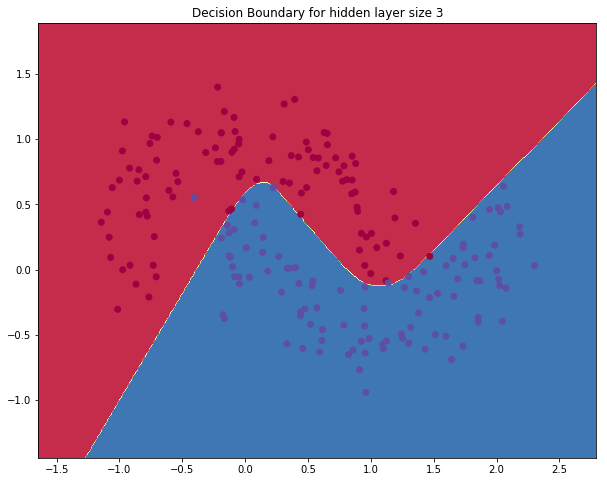

In [11]:
model = build_model(3, print_loss=True)
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

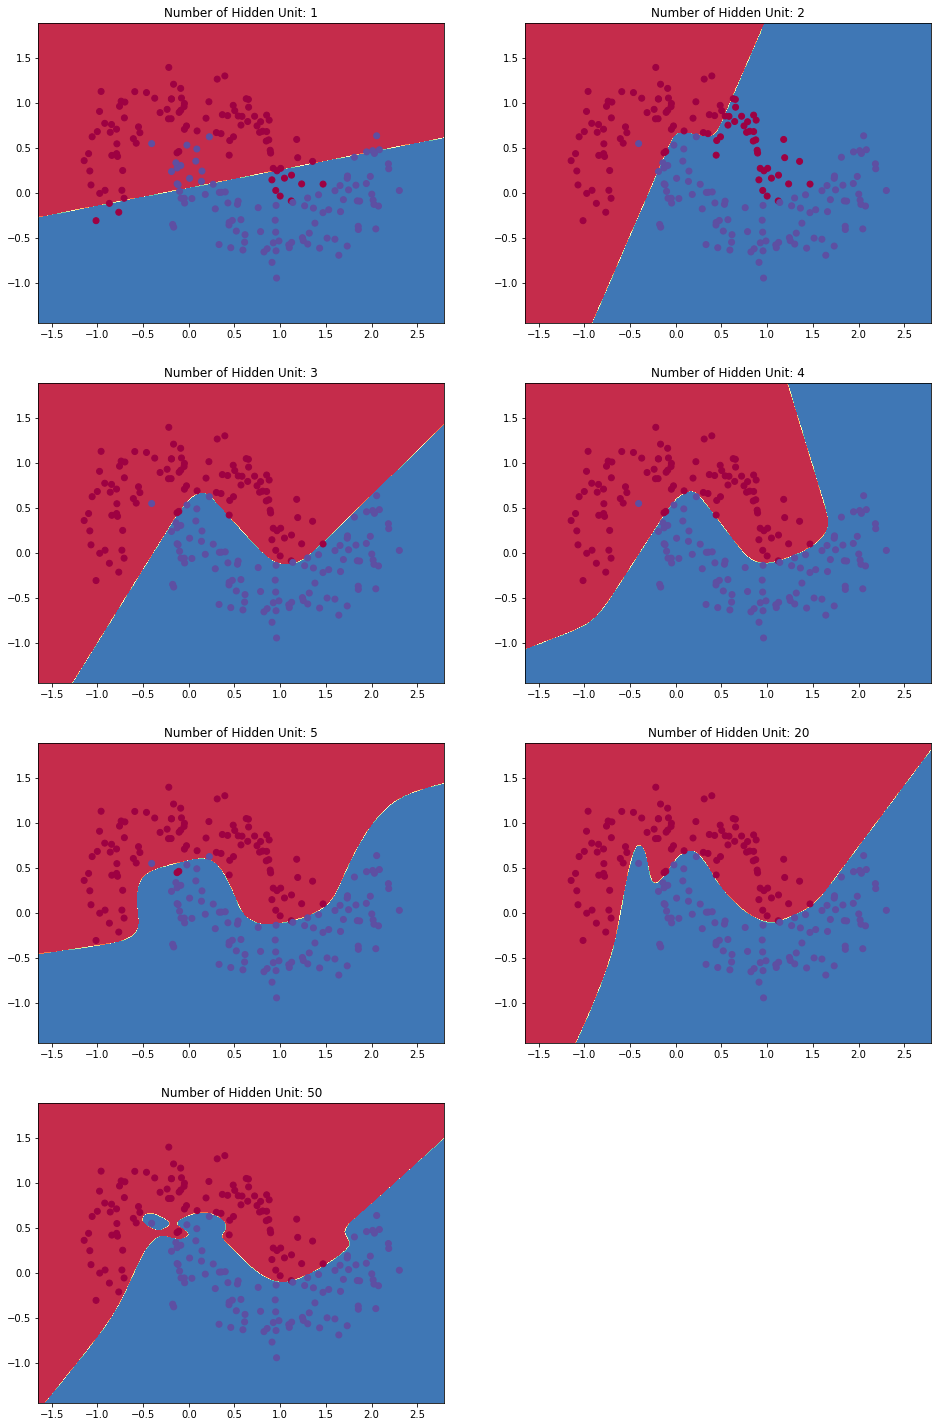

In [12]:
plt.figure(figsize=(16, 32))
# non-linear separator with diffrenet hidden layer unit
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, neural_network_hidden_dimention in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Number of Hidden Unit: %d' % neural_network_hidden_dimention)
    model = build_model(neural_network_hidden_dimention)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()